In [23]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [24]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"dataset1\train",
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 1351 files belonging to 4 classes.


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_set = train_datagen.flow_from_directory(
        'dataset1/train',
        target_size=(224,224),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1351 images belonging to 4 classes.


In [26]:
train_set.class_indices

{'Degree1': 0, 'Degree2': 1, 'Degree3': 2, 'healthy': 3}

In [27]:
class_names = list(train_set.class_indices.keys())
class_names

['Degree1', 'Degree2', 'Degree3', 'healthy']

In [28]:
count=0
for image_batch, label_batch in train_set:
#     print(label_batch)
    print(image_batch[4])
    break
#     count+=1
#     if count>2:
#         break

[[[0.52671504 0.2960167  0.28033042]
  [0.54866123 0.31728867 0.3016024 ]
  [0.58146304 0.3437523  0.32489696]
  ...
  [0.00392157 0.         0.        ]
  [0.00392157 0.         0.        ]
  [0.00392157 0.         0.        ]]

 [[0.5245042  0.29435855 0.27867228]
  [0.54534495 0.31397238 0.2982861 ]
  [0.5764886  0.3398833  0.32158065]
  ...
  [0.00392157 0.         0.        ]
  [0.00392157 0.         0.        ]
  [0.00392157 0.         0.        ]]

 [[0.5222934  0.29270038 0.2770141 ]
  [0.54202867 0.3106561  0.29496983]
  [0.5715142  0.3360143  0.31826437]
  ...
  [0.00392157 0.         0.        ]
  [0.00392157 0.         0.        ]
  [0.00392157 0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.823118   0.5917454  0.5760591 ]
  [0.8295538  0.59454376 0.58067626]
  [0.82567143 0.5811169  0.57113177]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [29]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_set = validation_datagen.flow_from_directory(
        'dataset1/val',
        target_size=(224,224),
        batch_size=32,
        class_mode="sparse"
)

Found 168 images belonging to 4 classes.


In [30]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_set = test_datagen.flow_from_directory(
        'dataset1/test',
        target_size=(224,224),
        batch_size=32,
        class_mode="sparse"
)

Found 171 images belonging to 4 classes.


In [31]:
for image_batch, label_batch in test_set:
    print(image_batch[0])
    break

[[[0.43921572 0.4330263  0.5091899 ]
  [0.43921572 0.4327079  0.508553  ]
  [0.43921572 0.43238947 0.50791615]
  ...
  [0.43462825 0.44017768 0.5160192 ]
  [0.43821493 0.43757492 0.5199279 ]
  [0.44086948 0.43921572 0.51476514]]

 [[0.43921572 0.43529415 0.5170071 ]
  [0.43921572 0.43529415 0.51637024]
  [0.43921572 0.43529415 0.5157334 ]
  ...
  [0.4339914  0.43922243 0.51633763]
  [0.43917018 0.43789333 0.52024627]
  [0.44055104 0.43921572 0.5138099 ]]

 [[0.43596002 0.43529415 0.52156866]
  [0.43659687 0.43529415 0.52156866]
  [0.43723372 0.43529415 0.52156866]
  ...
  [0.4333546  0.4382671  0.5166561 ]
  [0.44012544 0.43821177 0.5205647 ]
  [0.4402326  0.43921572 0.51285464]]

 ...

 [[0.454902   0.46376202 0.5696444 ]
  [0.4569099  0.4666667  0.57254905]
  [0.46274513 0.4666667  0.57254905]
  ...
  [0.48627454 0.49411768 0.59607846]
  [0.48627454 0.49411768 0.59607846]
  [0.48627454 0.49411768 0.59607846]]

 [[0.454902   0.46408045 0.5699628 ]
  [0.4575467  0.4666667  0.57254905]


In [32]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [33]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [34]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [35]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

In [36]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [37]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [38]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [39]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/50
43/43 [==============================] - 152s 3s/step - loss: 0.9689 - accuracy: 0.6558 - val_loss: 0.6881 - val_accuracy: 0.6901
Epoch 2/50
43/43 [==============================] - 151s 3s/step - loss: 0.4734 - accuracy: 0.8053 - val_loss: 0.6327 - val_accuracy: 0.7251
Epoch 3/50
43/43 [==============================] - 163s 4s/step - loss: 0.4198 - accuracy: 0.8187 - val_loss: 0.8415 - val_accuracy: 0.6901
Epoch 4/50
43/43 [==============================] - 177s 4s/step - loss: 0.3595 - accuracy: 0.8453 - val_loss: 0.6302 - val_accuracy: 0.7485
Epoch 5/50
43/43 [==============================] - 185s 4s/step - loss: 0.3237 - accuracy: 0.8616 - val_loss: 0.5640 - val_accuracy: 0.7251
Epoch 6/50
43/43 [==============================] - 168s 4s/step - loss: 0.3199 - accuracy: 0.8668 - val_loss: 0.5540 - val_accuracy: 0.7719
Epoch 7/50
43/43 [==============================] - 183s 4s/step - loss: 0.3110 - accuracy: 0.8742 - val_loss: 0.5966 - val_accuracy: 0.7368
Epoch 8/50
43

In [41]:
acc =r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

In [40]:
scores = model.evaluate(test_set)

6/6 [==============================] - 16s 2s/step - loss: 0.8572 - accuracy: 0.7719


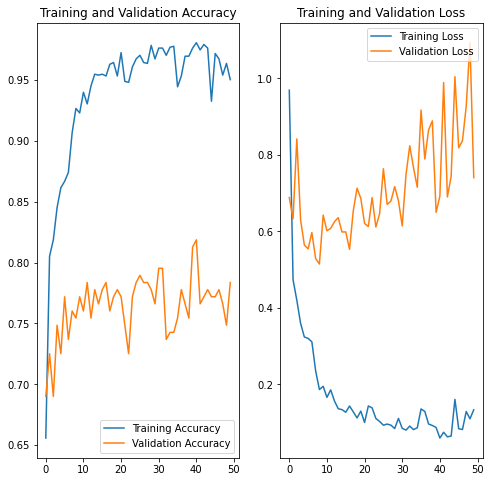

In [42]:
EPOCHS=50
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
scores = model.evaluate(test_set)

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 98ms/step


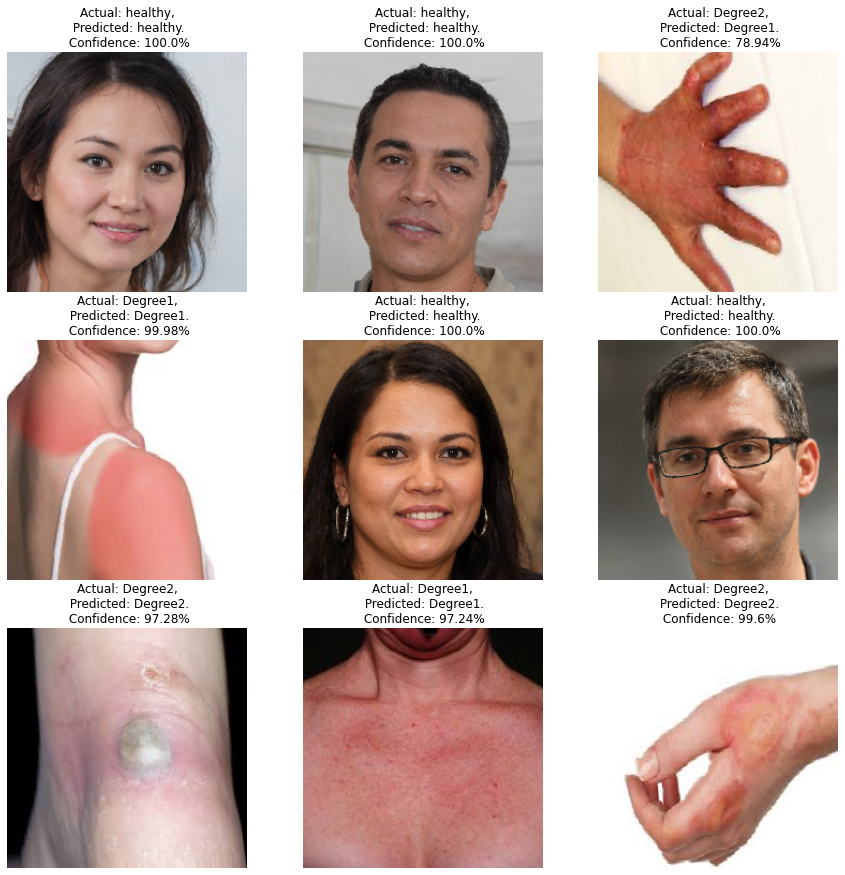

In [44]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break